# Week6 HW

### wine dataset을 활용하여 PCA 혹은 FA를 적용한 후, 적용하기 전과 적용한 후 분류모델의 성능을 비교

#### Week 6 Session :: PCA

In [503]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

eigen decomposition 을 이용한 PCA

In [504]:
# generate toy dataset
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

X.shape

(60, 3)

In [505]:
# PCA를 수행하기 위해 먼저 공분산행렬을 구합니다.
X_cen = X - X.mean(axis=0)  # scaling
X_cov = np.dot(X_cen.T, X_cen) / 59 # covariance matrix

print(X_cov)

[[0.69812855 0.17640539 0.12137931]
 [0.17640539 0.1801727  0.07253614]
 [0.12137931 0.07253614 0.04552382]]


In [506]:
# 다음으로 공분산행렬 X_cov에 대하여 eigenvalue와 eigenvector를 구합니다.
w, v = np.linalg.eig(X_cov)

print('eigenvalue :', w)
print('eigenvector :', v)


eigenvalue : [0.77830975 0.1351726  0.01034272]
eigenvector : [[ 0.93636116  0.34027485 -0.08626012]
 [ 0.29854881 -0.90119108 -0.31420255]
 [ 0.18465208 -0.2684542   0.94542898]]


In [507]:
# 마지막으로 데이터에 대한 eigenvector들의 설명력을 확인합니다.
print('explained variance ratio :', w / w.sum())

explained variance ratio : [0.84248607 0.14631839 0.01119554]


#### Singular Value Decomposition을 이용한 PCA

In [508]:
# generate toy dataset
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

X.shape

(60, 3)

In [509]:
# PCA를 수행하기 위해 먼저 데이터셋 X를 스케일링 합니다.
X_cen = X - X.mean(axis=0)  # scaling

print(X[0:5])
print(X_cen[0:5])

[[-1.01570027 -0.55091331 -0.26132626]
 [-0.00771675  0.59958572  0.03507755]
 [-0.95317135 -0.46453691 -0.24920288]
 [-0.92012304  0.21009593  0.02182381]
 [-0.76309739  0.158261    0.19152496]]
[[-1.03976771e+00 -7.60238460e-01 -3.32880482e-01]
 [-3.17841939e-02  3.90260570e-01 -3.64766659e-02]
 [-9.77238797e-01 -6.73862060e-01 -3.20757101e-01]
 [-9.44190485e-01  7.70779228e-04 -4.97304144e-02]
 [-7.87164831e-01 -5.10641487e-02  1.19970744e-01]]


In [510]:
# 다음으로 X_cen에 대하여 singular value와 singular vector를 구합니다.
U, D, V_t = np.linalg.svd(X_cen)

print('singular value :', D)
print('singular vector :\n', V_t.T)

singular value : [6.77645005 2.82403671 0.78116597]
singular vector :
 [[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]


In [511]:
# 마지막으로 설명력을 확인합니다.
print('explained variance ratio :', D ** 2 / np.sum(D**2))

explained variance ratio : [0.84248607 0.14631839 0.01119554]


### Week 6 LAB :: PCA & FA

In [512]:
# load iris dataset
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names']+['target'])
df.head()
df['target'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [513]:
df.shape

(150, 5)

In [514]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Principal Component Analysis

In [515]:
# 먼저 scaling을 실시합니다.
# Transform scales onto unit scale (mean=0 and variance=1)
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df.loc[:, features].values
y = df.loc[:, ['target']].values

X = StandardScaler().fit_transform(X) # Standardization using Standard Scaler
X

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [516]:
pd.DataFrame(data=X, columns=features).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [517]:
# 다음으로 공분산행렬을 구합니다.
covariance_matrix = np.cov(X.T)

print(covariance_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [518]:
# 공분산행렬에 대하여 eigenvalue와 eigenvector를 구합니다.
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

print('eigenvalue :', eig_vals) # eigen values
print('eigenvector :', eig_vecs) # eigen vectors

eigenvalue : [2.93808505 0.9201649  0.14774182 0.02085386]
eigenvector : [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


가장 큰 고유값인 2.93808505을 갖는 eigen vector가 제1주성분이 됩니다.

In [519]:
# PCA를 진행합니다.
pca = PCA(n_components=2) # PCA 선언 : 2차원으로 차원 축소 => 제1주성분, 제2주성분 총 2개의 주성분 반환
X_pca = pca.fit_transform(X) # PCA 적합

df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca = pd.concat([df_pca, df[['target']]], axis=1)

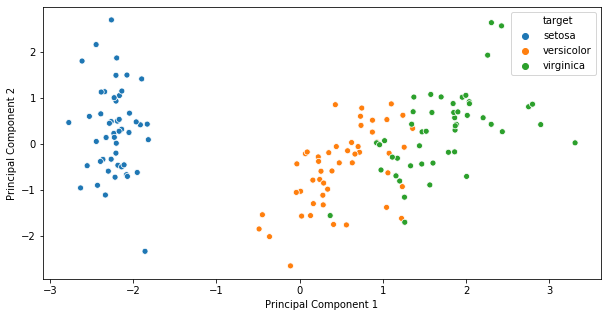

In [520]:
# PCA 결과를 시각화를 통해 확인합니다.
plt.figure(figsize=(10, 5))
sns.scatterplot(x = df_pca['Principal Component 1'], y = df_pca['Principal Component 2'], hue = df_pca['target'])

In [521]:
# 주성분들의 설명력을 확인합니다.
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

PC1은 데이터를 약 72% 정도, PC2는 23% 정도 설명합니다.

## Factor Analysis : scikit-learn의 FactorAnalysis 이용

In [522]:
# Create factor analysis object and perform factor analysis
X = df.loc[:, features].values
fa = FactorAnalysis(n_components=10)
X_fa = fa.fit_transform(X)

In [523]:
df_fa = pd.DataFrame(data=X_fa, columns=['Factor1', 'Factor2', 'Factor3', 'Factor4'])
df_fa.head()

,Factor1,Factor2,Factor3,Factor4
0,-1.226043,0.269089,0.0,0.0
1,-1.232343,-0.201804,0.0,0.0
2,-1.330547,-0.109966,0.0,0.0
3,-1.302661,-0.235704,0.0,0.0
4,-1.263690,0.312552,0.0,0.0


Factor1과 Factor2만 유의미합니다.

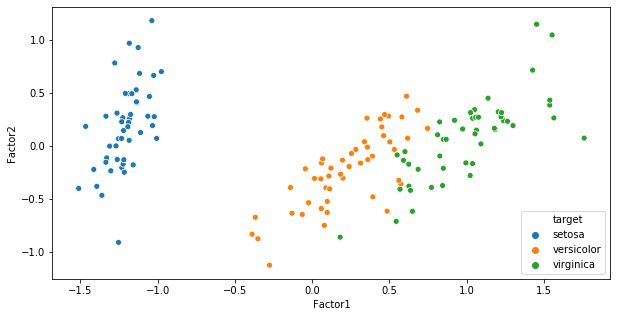

In [524]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x = df_fa['Factor1'], y = df_fa['Factor2'], hue=df['target'])

## Factor Analysis : factor_analyzer의 FactorAnalyzer 이용

In [525]:
# Import the required modules
import pandas as pd
import sklearn.datasets
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [526]:
# Import the dataset
fpath = './bfi.csv'
df = pd.read_csv(fpath, index_col=0)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [527]:
# Drop unnecessary columns
df.drop(['gender', 'education', 'age'], axis=1, inplace=True)
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [528]:
df = df.dropna()

In [529]:
# create a factor analyzer variable and perform factor analysis
fa = FactorAnalyzer(n_factors=6, rotation='varimax')

In [530]:
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=6, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [531]:
# get the eigenvectors and eigenvalues
ev, v = fa.get_eigenvalues()

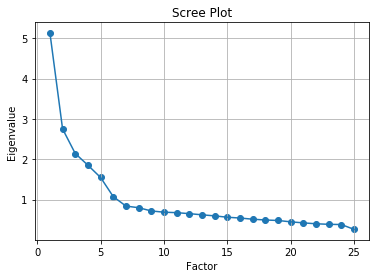

In [532]:
# Do a scree plot
xvals = range(1, df.shape[1]+1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# HW-pca

In [533]:
from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(data=np.c_[wine['data'], wine['target']], columns=wine['feature_names']+['target'])

In [534]:
df.shape

(178, 14)

In [535]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [536]:
features=['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids','nonflavanoid_phenols','proanthocyanins', 'color_intensity','hue','od280/od315_of_diluted_wines','proline']
X = df.loc[:, features].values
y = df.loc[:, ['target']].values

#split train-test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state=40)

In [537]:
#이제 logistic reg로 성능 비교해보자.
from sklearn.linear_model import LogisticRegression

In [538]:
model_log1 = LogisticRegression(solver='sag', max_iter=10000)
model_log1.fit(X_train, y_train)
print(model_log1.score(X_train, y_train))
print(model_log1.score(X_test, y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9274193548387096
0.9259259259259259


## pca

In [539]:
X_scaled = StandardScaler().fit_transform(X) # Standardization using Standard Scaler

In [540]:
pd.DataFrame(data=X_scaled, columns=features).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [541]:
covariance_matrix = np.cov(X_scaled.T)

In [542]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)

print('eigenvalue :', eig_vals) # eigen values
print('eigenvector :', eig_vecs) # eigen vectors

eigenvalue : [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]
eigenvector : [[-0.1443294   0.48365155  0.20738262 -0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093 -0.08901289  0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881 -0.6262239  -0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905  -0.61208035  0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634   -0.13075693 -0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.394660

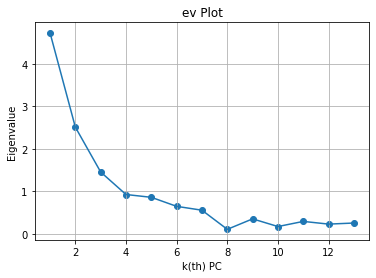

In [543]:
# Do a scree plot
xvals = range(1, df.shape[1])

plt.scatter(xvals, eig_vals)
plt.plot(xvals, eig_vals)
plt.title('ev Plot')
plt.xlabel('k(th) PC')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [544]:
# PCA를 진행
pca = PCA(n_components=4) # PCA 선언 : 4차원으로 차원 축소 => 총 4개의 주성분 반환
X_scaled_pca=pca.fit_transform(X_scaled) # PCA 적합
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_scaled_pca, y, test_size=0.3, random_state=40, stratify=y)

In [545]:
# 주성분들의 설명력을 확인합니다.
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum()) # pca의 주성분 4개로 데이터를 74% 정도 설명한다.

[0.36198848 0.1920749  0.11123631 0.0706903 ]
0.735989990758993


In [546]:
model_log2 = LogisticRegression(solver='sag', max_iter=10000, multi_class='auto')
model_log2.fit(X_train_pca, y_train)
print(model_log2.score(X_train_pca, y_train))
print(model_log2.score(X_test_pca, y_test))

0.9919354838709677
0.9629629629629629


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# HW-FA

In [547]:
fa = FactorAnalyzer(n_factors=4, rotation='varimax')

In [548]:
fa.fit(X)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [549]:
ev, v = fa.get_eigenvalues()
print(ev)
print(v)

[4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.34849736 0.28887994 0.25090248 0.22578864 0.16877023
 0.10337794]
[ 4.40660223  2.18876911  1.24106032  0.57062602  0.21359454  0.18883838
  0.05464085  0.01266816 -0.0161182  -0.0222632  -0.06420643 -0.16190635
 -0.20833052]


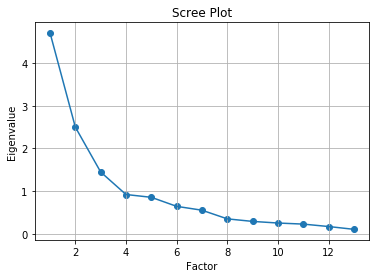

In [550]:
# Do a scree plot
xvals = range(1, X.shape[1]+1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [551]:
var, prop_var, cum_var=fa.get_factor_variance()
print(var)
print(prop_var)
print(cum_var)
# factor가 4개일 때 데이터 설명력: 64.6%

[3.13751883 2.17375547 1.72392602 1.36877458]
[0.2413476  0.16721196 0.13260969 0.10529035]
[0.2413476  0.40855956 0.54116926 0.64645961]


In [552]:
fa = FactorAnalyzer(n_factors=6, rotation='varimax')

In [553]:
fa.fit(X)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=6, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [554]:
ev, v = fa.get_eigenvalues()
print(ev)
print(v)

[4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.34849736 0.28887994 0.25090248 0.22578864 0.16877023
 0.10337794]
[ 4.43748301e+00  2.34922202e+00  1.25416986e+00  7.93003734e-01
  5.54065743e-01  3.82014775e-01  9.71698128e-02  4.01272750e-02
  1.79708816e-02  3.84434573e-04 -2.01735008e-02 -5.33771746e-02
 -8.71590572e-02]


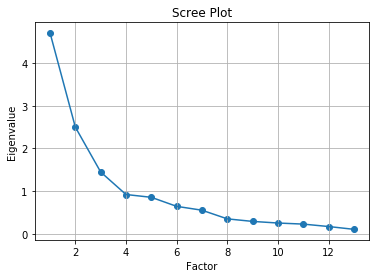

In [555]:
# Do a scree plot
xvals = range(1, X.shape[1]+1)

plt.scatter(xvals, ev)
plt.plot(xvals, ev)
plt.title('Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [556]:
var, prop_var, cum_var=fa.get_factor_variance()
print(var)
print(prop_var)
print(cum_var)
# factor가 6개일 때 데이터 설명력: 75.1%

[3.24557699 1.77186318 1.34372217 1.19005906 1.16582408 1.04785634]
[0.24965977 0.13629717 0.10336324 0.091543   0.08967878 0.08060433]
[0.24965977 0.38595694 0.48932018 0.58086318 0.67054196 0.75114629]


#############################################################

In [557]:
fa=FactorAnalyzer(n_factors=4, rotation='varimax')
X_fa = fa.fit_transform(X)

X_train_fa, X_test_fa, y_train, y_test = train_test_split(X_fa, y, test_size=0.3, random_state=40, stratify=y)

In [558]:
model_log3 = LogisticRegression(solver='sag', max_iter=10000, multi_class='auto')
model_log3.fit(X_train_fa, y_train)
print(model_log3.score(X_train_fa, y_train))
print(model_log3.score(X_test_fa, y_test))

1.0
0.9814814814814815


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
